## Installing PyCaret

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)


[PyCaret](https://pycaret.readthedocs.io/en/latest/) is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially.

In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more.

In [ ]:
!pip install pycaret[full]
!pip install interpret-community

## Getting the Data

In [2]:
import pandas as pd
import numpy as np
from numpy import sum as arraysum

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/dev_preproc.csv')
dataset.drop(['AYB', 'EYB'], axis=1, inplace=True)
dataset.head()

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS,RMDL
0,4,0,Warm Cool,1,4,1095000.0,1,2522.0,3 Story,Row Inside,Very Good,4,Common Brick,Metal- Sms,Hardwood,2,5,1680,Ward 2,2003,93.0,31,315.250,1
1,3,1,Hot Water Rad,1,5,1602000.0,1,2484.0,3 Story,Row Inside,Very Good,4,Common Brick,Built Up,Hardwood,2,3,1680,Ward 2,2006,106.0,22,310.500,1
2,3,2,Hot Water Rad,1,5,1950000.0,1,5344.0,4 Story,Row Inside,Very Good,4,Common Brick,Built Up,Hardwood,1,4,2196,Ward 2,2010,97.0,38,534.400,0
3,3,1,Hot Water Rad,1,4,1050000.0,1,2401.0,3 Story,Row Inside,Very Good,3,Common Brick,Metal- Sms,Hardwood,2,1,1627,Ward 2,2011,105.0,39,300.125,1
4,3,1,Warm Cool,1,3,1325000.0,1,2692.0,2 Story,Row Inside,Above Average,5,Stucco,Metal- Sms,Hardwood,2,1,1815,Ward 2,2011,94.0,44,538.400,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35731 entries, 0 to 35730
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BATHRM             35731 non-null  int64  
 1   HF_BATHRM          35731 non-null  int64  
 2   HEAT               35731 non-null  object 
 3   AC                 35731 non-null  int64  
 4   BEDRM              35731 non-null  int64  
 5   PRICE              35731 non-null  float64
 6   SALE_NUM           35731 non-null  int64  
 7   GBA                35731 non-null  float64
 8   STYLE              35731 non-null  object 
 9   STRUCT             35731 non-null  object 
 10  GRADE              35731 non-null  object 
 11  CNDTN              35731 non-null  int64  
 12  EXTWALL            35731 non-null  object 
 13  ROOF               35731 non-null  object 
 14  INTWALL            35731 non-null  object 
 15  KITCHENS           35731 non-null  int64  
 16  FIREPLACES         357

In [5]:
dataset.describe()

,BATHRM,HF_BATHRM,AC,BEDRM,PRICE,SALE_NUM,GBA,CNDTN,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS,RMDL
count,35731.000000,35731.000000,35731.000000,35731.000000,3.573100e+04,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000,35731.000000
mean,2.187120,0.675240,0.757186,3.394727,5.429800e+05,1.471132,1699.806946,3.729982,1.228429,0.668075,3113.148051,2007.218326,72.736084,37.227198,230.620682,0.592539
std,1.000041,0.597492,0.428790,1.063250,4.132502e+05,1.144658,729.404286,0.711956,0.591799,0.875761,2701.520880,6.375721,30.886655,15.442090,68.411476,0.491369
min,0.000000,0.000000,0.000000,0.000000,2.500000e+02,1.000000,252.000000,1.000000,0.000000,0.000000,216.000000,1982.000000,0.000000,0.000000,69.333333,0.000000
25%,1.000000,0.000000,1.000000,3.000000,2.520000e+05,1.000000,1224.000000,3.000000,1.000000,0.000000,1504.000000,2003.000000,59.000000,32.000000,182.857143,0.000000
50%,2.000000,1.000000,1.000000,3.000000,4.410000e+05,1.000000,1512.000000,4.000000,1.000000,0.000000,2180.000000,2008.000000,77.000000,41.000000,219.428571,1.000000
75%,3.000000,1.000000,1.000000,4.000000,7.300000e+05,1.000000,1960.000000,4.000000,1.000000,1.000000,4000.000000,2013.000000,94.000000,47.000000,264.000000,1.000000
max,11.000000,5.000000,1.000000,15.000000,6.750000e+06,12.000000,11810.000000,6.000000,6.000000,13.000000,95370.000000,2016.000000,236.000000,73.000000,1073.636364,1.000000


In order to evaluate the predictions on completely unseen data, a sample of 9338 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 9338 records were not available at the time when the machine learning experiment was performed.

In [6]:
data_unseen = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/test_preproc.csv')
data_unseen.drop(['AYB', 'EYB'], axis=1, inplace=True)
data_unseen['SALEYEAR'] = data_unseen['SALEYEAR'].astype(np.int64)
data_unseen.head()

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS,RMDL
0,3,1,Hot Water Rad,1,5,2100000.0,3,2522.0,3 Story,Row Inside,Very Good,5,Common Brick,Built Up,Hardwood,2,4,1680,Ward 2,2016,106.0,32.0,280.222222,1
1,3,1,Warm Cool,1,3,1430000.0,4,1488.0,2 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,1,1424,Ward 2,2018,110.0,51.0,212.571429,1
2,3,1,Warm Cool,1,4,1550000.0,5,2552.0,3 Story,Row Inside,Above Average,5,Common Brick,Metal- Sms,Hardwood,2,2,1853,Ward 2,2016,136.0,49.0,283.555556,1
3,3,1,Forced Air,1,4,1700000.0,3,2382.0,3 Story,Row Inside,Above Average,6,Common Brick,Metal- Sms,Hardwood,2,3,1853,Ward 2,2018,218.0,51.0,183.230769,1
4,3,2,Forced Air,1,4,1700000.0,2,2520.0,3 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,2,1853,Ward 2,2017,217.0,50.0,252.000000,1


In [7]:
data_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9338 entries, 0 to 9337
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BATHRM             9338 non-null   int64  
 1   HF_BATHRM          9338 non-null   int64  
 2   HEAT               9338 non-null   object 
 3   AC                 9338 non-null   int64  
 4   BEDRM              9338 non-null   int64  
 5   PRICE              9338 non-null   float64
 6   SALE_NUM           9338 non-null   int64  
 7   GBA                9338 non-null   float64
 8   STYLE              9338 non-null   object 
 9   STRUCT             9338 non-null   object 
 10  GRADE              9338 non-null   object 
 11  CNDTN              9338 non-null   int64  
 12  EXTWALL            9338 non-null   object 
 13  ROOF               9338 non-null   object 
 14  INTWALL            9338 non-null   object 
 15  KITCHENS           9338 non-null   int64  
 16  FIREPLACES         9338 

In [8]:
data_unseen.describe()

,BATHRM,HF_BATHRM,AC,BEDRM,PRICE,SALE_NUM,GBA,CNDTN,KITCHENS,FIREPLACES,LANDAREA,SALEYEAR,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS,RMDL
count,9338.000000,9338.000000,9338.000000,9338.000000,9.338000e+03,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000,9338.000000
mean,2.332619,0.675198,0.799422,3.455237,8.080494e+05,3.671236,1674.556329,3.959949,1.228957,0.610623,2977.887985,2016.997001,81.128186,44.556008,225.590472,0.646177
std,1.017196,0.574332,0.400455,1.082531,4.931204e+05,1.432524,731.226425,0.779615,0.592019,0.883986,2495.993451,0.742959,32.549728,17.504543,66.569368,0.478181
min,0.000000,0.000000,0.000000,0.000000,5.100000e+04,1.000000,407.000000,1.000000,0.000000,0.000000,327.000000,2016.000000,0.000000,0.000000,81.400000,0.000000
25%,2.000000,0.000000,1.000000,3.000000,4.700000e+05,3.000000,1200.000000,3.000000,1.000000,0.000000,1479.000000,2016.000000,70.000000,38.000000,180.000000,0.000000
50%,2.000000,1.000000,1.000000,3.000000,7.150000e+05,3.000000,1480.000000,4.000000,1.000000,0.000000,2100.000000,2017.000000,88.000000,49.000000,213.225000,1.000000
75%,3.000000,1.000000,1.000000,4.000000,9.750000e+05,4.000000,1920.000000,4.000000,1.000000,1.000000,3745.000000,2018.000000,103.000000,54.000000,257.870536,1.000000
max,10.000000,7.000000,1.000000,20.000000,5.650000e+06,15.000000,7940.000000,6.000000,5.000000,8.000000,39831.000000,2018.000000,251.000000,78.000000,748.250000,1.000000


The training data are the transactions that happened from 1982 to 2016 which contains 35731 records and the testing data are from 2016 to 2018 which contains 9338 records. We split the testing data to the recent years to simulate real-world scenario.

In [9]:
print(f"Training Data: {dataset['SALEYEAR'].min()} to {dataset['SALEYEAR'].max()}")
print(f"Testing Data: {data_unseen['SALEYEAR'].min()} to {data_unseen['SALEYEAR'].max()}")

Training Data: 1982 to 2016
Testing Data: 2016 to 2018


## Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. Besides performing some basic processing tasks by default, PyCaret also offers wide array of pre-processing features which structurally elevates an average machine learning experiment to an advanced solution.

In [10]:
import pycaret.regression as reg

In [11]:
regression_setup = reg.setup(data=dataset, target='PRICE', session_id=42, # use_gpu=True,
                         categorical_features=['HEAT', 'STYLE', 'AC', 'STRUCT', 'GRADE', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD', 'CNDTN', 'RMDL'],
                         numeric_features=['BATHRM', 'HF_BATHRM', 'BEDRM', 'SALE_NUM', 'SQFT_ROOMS', 'AYB_SALEYEAR_DIFF', 'EYB_SALEYEAR_DIFF', 'GBA', 'KITCHENS', 'FIREPLACES', 'LANDAREA', 'SALEYEAR'])  

,Description,Value
0,session_id,42
1,Target,PRICE
2,Original Data,"(35731, 24)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(25011, 121)"


## Baseline Model

When we evaluate a model's performance, it is important to create a baseline model so we can see whether our model improved from the baseline and how much did it improve. Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

Source: https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa

In [12]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = dataset.drop('PRICE', axis=1)
y = dataset['PRICE']

def evaluate_baseline(model):
     scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
     scores = -scores.mean()
     return scores

dummy_reg_mean = DummyRegressor(strategy="mean")
dummy_reg_median = DummyRegressor(strategy='median')
dummy_reg_quantile = DummyRegressor(strategy='quantile', quantile=0.44)
dummy_reg_constant = DummyRegressor(strategy='constant', constant=450000)

print('Dummy Regressor (mean):', evaluate_baseline(dummy_reg_mean))
print('Dummy Regressor (median): ', evaluate_baseline(dummy_reg_median))
print('Dummy Regressor (quantile):', evaluate_baseline(dummy_reg_quantile))
print('Dummy Regressor (constant):', evaluate_baseline(dummy_reg_constant))

Dummy Regressor (mean): 333345.5060600585
Dummy Regressor (median):  329602.75333447213
Dummy Regressor (quantile): 326992.0741105898
Dummy Regressor (constant): 291496.4690490033


## Comparing All Models

When comparing models, we will create all models using 5 fold cross validation. We will focus on the Mean Absolute Error (MAE) because it is robuts to outliers which exist in our dataset.

In [13]:
models = reg.compare_models(fold=5, sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,69510.5570,1.385193e+10,117340.2165,0.9201,0.2166,0.2082,7.326
et,Extra Trees Regressor,73284.8741,1.627565e+10,127295.6884,0.9061,0.2252,0.2136,20.546
lightgbm,Light Gradient Boosting Machine,74778.4568,1.563325e+10,124673.6238,0.9098,0.2302,0.2214,0.514
rf,Random Forest Regressor,76102.8813,1.772773e+10,132837.1016,0.8976,0.2307,0.2216,20.532
xgboost,Extreme Gradient Boosting,76504.6781,1.642432e+10,127952.3219,0.9052,0.2367,0.2209,15.726
gbr,Gradient Boosting Regressor,87493.7318,2.006505e+10,141450.1912,0.8841,0.2795,0.2611,5.562
dt,Decision Tree Regressor,113125.8426,3.681146e+10,191792.5787,0.7873,0.3295,0.2881,0.400
br,Bayesian Ridge,127993.6070,3.484284e+10,186579.9905,0.7987,0.5654,0.4797,0.350
llar,Lasso Least Angle Regression,128076.9820,3.489186e+10,186714.1413,0.7984,0.5627,0.4802,0.572
ridge,Ridge Regression,128129.7703,3.488547e+10,186696.4875,0.7984,0.5691,0.4803,0.060


## Create a Model

![](https://avatars.mds.yandex.net/get-yablogs/51163/file_1500371746775/orig)

[CatBoost](https://catboost.ai/) is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

Based on the above benchmark, we can see that CatBoost is the top performing model with Mean Absolute Error of 7.791458e+04 during the 5-fold cross validation. Therefore, we will create a catboost model and tune its parameters in the next step.

In [12]:
catboost = reg.create_model('catboost', random_state=42)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,66696.6105,1.148832e+10,107183.5710,0.9308,0.2075,0.1542
1,70277.4133,1.403237e+10,118458.3003,0.9271,0.2456,0.4911
2,68686.4882,1.275606e+10,112942.7175,0.9278,0.2030,0.1550
3,67166.7834,1.130018e+10,106302.2861,0.9280,0.2129,0.1574
4,69766.6233,2.250661e+10,150022.0230,0.8739,0.2289,0.3450
5,69317.2390,1.286999e+10,113445.9939,0.9278,0.2153,0.1607
6,69556.8313,1.148051e+10,107147.1362,0.9327,0.2031,0.1525
7,70416.6307,1.258035e+10,112162.1636,0.9267,0.2245,0.1672
8,69214.1294,1.274744e+10,112904.5395,0.9222,0.2024,0.1536
9,70651.9478,1.729719e+10,131518.7781,0.9012,0.2104,0.1586


## Tuning the Model

In order to tune the model, we use the library [Hyperopt](http://hyperopt.github.io/hyperopt/), an open source hyperparameter optimization framework to automate hyperparameter search. It efficiently search large spaces and prune unpromising trials for faster results.

In [13]:
tuned_catboost = reg.tune_model(catboost, n_iter=30, fold=5, optimize ='MAE', 
                                search_library ='tune-sklearn', search_algorithm='hyperopt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,70930.2297,1.514559e+10,123067.4248,0.9155,0.2379,0.3684
1,69249.4572,1.297285e+10,113898.4268,0.9222,0.2157,0.1602
2,71130.8427,1.897381e+10,137745.4696,0.8936,0.2300,0.2928
3,70608.1941,1.275178e+10,112923.7631,0.9255,0.2166,0.1612
4,71428.3416,1.579691e+10,125685.7506,0.9068,0.2113,0.1588
Mean,70669.4131,1.512819e+10,122664.1670,0.9127,0.2223,0.2283
SD,758.5430,2.259608e+09,9038.2735,0.0115,0.0100,0.0869


#### Prediction Error Plot

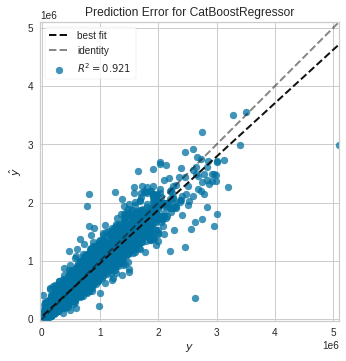

In [14]:
reg.plot_model(tuned_catboost, plot = 'error')

#### Learning Curve

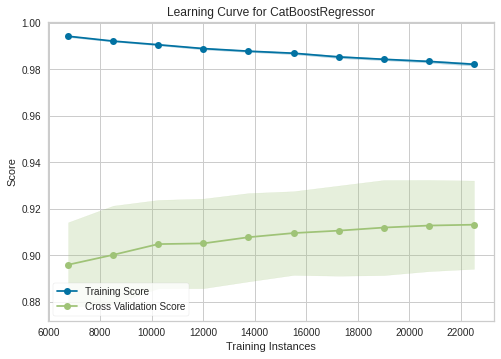

In [15]:
reg.plot_model(tuned_catboost, plot = 'learning')

#### Validation Curve

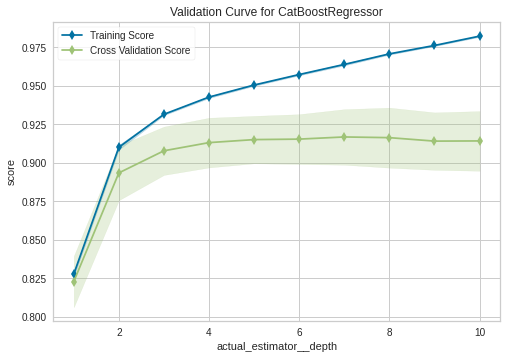

In [16]:
reg.plot_model(tuned_catboost, plot = 'vc')

#### Feature Importance Using SHAP

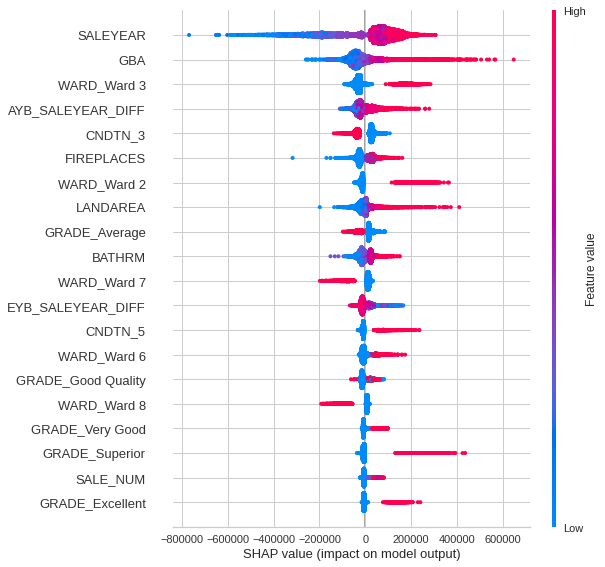

In [17]:
reg.interpret_model(tuned_catboost)

#### Permutation Feature Importance

In [19]:
reg.interpret_model(tuned_catboost, plot='pfi')

121it [00:05, 24.09it/s]


## Finalize and save the model

After evaluate the results on development data, we will finalize the model by train it using the whole development data and then evaluate it on the testing data to simulate real-world scenario.

In [20]:
tuned_catboost.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 10,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 266,
 'l2_leaf_reg': 5,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.26363101601600647,
 'loss_function': 'RMSE',
 'max_leaves': 1024,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 42,
 'random_strength': 0.6699106693267822,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 0,
 'subsample'

In [21]:
final_model = reg.finalize_model(tuned_catboost)

In [22]:
reg.save_model(final_model, model_name='catboost_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['HEAT', 'STYLE',
                                                             'AC', 'STRUCT',
                                                             'GRADE', 'EXTWALL',
                                                             'ROOF', 'INTWALL',
                                                             'WARD', 'CNDTN',
                                                             'RMDL'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['BATHRM', 'HF_BATHRM',
                                                           'BEDRM', 'SALE_NUM',
                                                           'SQFT_ROOMS',
                                                           'AYB_SALEYEAR_DIFF',
            

## Predictions on unseen data

During prediction, we will use prediction interval. Prediction interval is a quantification of the uncertainty on a prediction which provides a probabilistic upper and lower bounds on the estimate of an outcome variable.

In this case, we will use 95% prediction interval which means: *Given a prediction of ‘y’ given ‘x’, there is a 95% likelihood that the range ‘a’ to ‘b’ covers the true outcome*

![](https://machinelearningmastery.com/wp-content/uploads/2018/04/Relationship-between-prediction-actual-value-and-prediction-interval.png)

Source: https://machinelearningmastery.com/prediction-intervals-for-machine-learning/

In [23]:
saved_catboost = reg.load_model('catboost_final')

Transformation Pipeline and Model Successfully Loaded


A prediction interval is different from a confidence interval. A confidence interval quantifies the uncertainty on an estimated population variable, such as the mean or standard deviation. Whereas a prediction interval quantifies the uncertainty on a single observation estimated from the population.

In [25]:
data_unseen_features = data_unseen.drop('PRICE', axis=1)
data_unseen_target = data_unseen['PRICE']
predictions = reg.predict_model(saved_catboost, data=data_unseen_features)

In [26]:
label = predictions['Label']
y = data_unseen_target

We can estimate the standard deviation in the prediction direction using the following formula:

`SE = sqrt(1 / (N - 2) * e(i)^2 for i to N)`

In [27]:
sum_errs = arraysum((y - label)**2)
stdev = np.sqrt(1/(len(y)-2) * sum_errs)
print(sum_errs, stdev)

300833540259664.3 179507.54432128702


We will use the significance level of 95%, which is 1.96 standard deviations.

In [28]:
interval = 1.96 * stdev
print(interval)

351834.78686972253


Once the interval is calculated, we can summarize the bounds on the prediction to the user.

In [29]:
lower, upper = label - interval, label + interval

## Evaluate Predictions

In [30]:
predictions

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS,RMDL,Label
0,3,1,Hot Water Rad,1,5,3,2522.0,3 Story,Row Inside,Very Good,5,Common Brick,Built Up,Hardwood,2,4,1680,Ward 2,2016,106.0,32.0,280.222222,1,2.085836e+06
1,3,1,Warm Cool,1,3,4,1488.0,2 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,1,1424,Ward 2,2018,110.0,51.0,212.571429,1,1.410404e+06
2,3,1,Warm Cool,1,4,5,2552.0,3 Story,Row Inside,Above Average,5,Common Brick,Metal- Sms,Hardwood,2,2,1853,Ward 2,2016,136.0,49.0,283.555556,1,1.823125e+06
3,3,1,Forced Air,1,4,3,2382.0,3 Story,Row Inside,Above Average,6,Common Brick,Metal- Sms,Hardwood,2,3,1853,Ward 2,2018,218.0,51.0,183.230769,1,1.786101e+06
4,3,2,Forced Air,1,4,2,2520.0,3 Story,Row Inside,Above Average,5,Common Brick,Built Up,Hardwood,2,2,1853,Ward 2,2017,217.0,50.0,252.000000,1,1.814799e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9333,1,0,Forced Air,0,2,3,832.0,2 Story,Semi-Detached,Average,4,Common Brick,Comp Shingle,Hardwood,1,0,1528,Ward 8,2018,68.0,49.0,208.000000,1,2.064057e+05
9334,2,1,Forced Air,1,2,4,832.0,2 Story,Row Inside,Above Average,5,Common Brick,Slate,Hardwood,1,0,1069,Ward 8,2018,77.0,51.0,138.666667,1,3.210594e+05
9335,2,1,Forced Air,1,3,3,912.0,2 Story,Row End,Average,5,Common Brick,Built Up,Hardwood,1,0,1834,Ward 8,2017,76.0,53.0,152.000000,1,3.252521e+05
9336,2,1,Forced Air,1,4,3,1200.0,2 Story,Row End,Above Average,4,Vinyl Siding,Comp Shingle,Hardwood,1,0,2220,Ward 8,2018,38.0,26.0,150.000000,1,3.002947e+05


First, we will evaluate the number of records that are in our prediction interval. We can see that out of 9338 records, there are 8964 records that are in the interval.

In [31]:
data_unseen.sample(10)

,BATHRM,HF_BATHRM,HEAT,AC,BEDRM,PRICE,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,WARD,SALEYEAR,AYB_SALEYEAR_DIFF,EYB_SALEYEAR_DIFF,SQFT_ROOMS,RMDL
360,2,1,Forced Air,1,4,1099000.0,3,1490.0,2 Story,Row Inside,Very Good,4,Common Brick,Metal- Pre,Wood Floor,2,0,928,Ward 1,2017,127.0,45.0,149.0,1
9162,4,0,Hot Water Rad,1,6,447500.0,3,3248.0,2 Story,Multi,Above Average,4,Common Brick,Metal- Sms,Hardwood,4,0,4201,Ward 8,2017,74.0,60.0,232.0,0
5576,2,1,Forced Air,1,3,818255.0,2,1716.0,4 Story,Row Inside,Very Good,6,Brick Veneer,Built Up,Hardwood,1,1,703,Ward 5,2016,1.0,0.0,214.5,0
7959,2,0,Forced Air,1,3,257000.0,5,930.0,2 Story,Semi-Detached,Average,4,Vinyl Siding,Comp Shingle,Hardwood/Carp,1,0,2173,Ward 7,2016,72.0,51.0,186.0,1
7411,1,1,Hot Water Rad,0,3,510000.0,2,1440.0,2 Story,Row Inside,Average,3,Common Brick,Metal- Sms,Hardwood,1,1,2125,Ward 6,2018,87.0,64.0,180.0,0
1183,3,1,Warm Cool,1,5,755000.0,6,1872.0,2 Story,Row Inside,Above Average,3,Common Brick,Built Up,Hardwood,2,0,2776,Ward 6,2016,105.0,49.0,144.0,1
4924,3,1,Forced Air,1,4,925000.0,2,2072.0,2 Story,Row Inside,Average,4,Common Brick,Metal- Sms,Hardwood,2,0,1826,Ward 4,2018,106.0,54.0,207.2,1
1558,3,1,Hot Water Rad,1,4,1375000.0,5,1770.0,2 Story,Row Inside,Good Quality,5,Common Brick,Metal- Sms,Hardwood,2,0,2203,Ward 6,2017,108.0,31.0,147.5,1
4639,3,1,Forced Air,1,4,910000.0,3,1926.0,2 Story,Row End,Above Average,4,Common Brick,Metal- Sms,Hardwood,1,1,1368,Ward 1,2017,97.0,33.0,321.0,1
708,2,1,Forced Air,1,3,894000.0,3,960.0,2 Story,Row Inside,Average,5,Common Brick,Built Up,Hardwood,1,0,1038,Ward 6,2018,93.0,36.0,160.0,1


In [32]:
data_unseen.shape

(9338, 24)

In [33]:
data_unseen[(data_unseen['PRICE'] > lower) & (data_unseen['PRICE'] < upper)].shape

(8964, 24)

In [34]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Max Error: " + str(max_error(data_unseen_target, predictions["Label"])))
print("Mean Absolute Error: " + str(mean_absolute_error(data_unseen_target, predictions["Label"])))
print("R2 Score: " + str(r2_score(data_unseen_target, predictions["Label"])))
print("Root Mean Squared Error: " + str(mean_squared_error(data_unseen_target, predictions["Label"], squared=False)))

Max Error: 3716209.8470203974
Mean Absolute Error: 106348.97719900089
R2 Score: 0.8675009090897456
Root Mean Squared Error: 179488.31995236213
